In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv('monday.csv', sep=';', parse_dates=['timestamp'], index_col=['timestamp'])
df2 = pd.read_csv('tuesday.csv', sep=';', parse_dates=['timestamp'], index_col=['timestamp'])
df3 = pd.read_csv('wednesday.csv', sep=';', parse_dates=['timestamp'],index_col=['timestamp'])
df4 = pd.read_csv('thursday.csv', sep=';', parse_dates=['timestamp'], index_col=['timestamp'])
df5 = pd.read_csv('friday.csv', sep=';', parse_dates=['timestamp'],index_col=['timestamp'])

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4884 entries, 2019-09-02 07:03:00 to 2019-09-02 21:50:00
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_no  4884 non-null   int64 
 1   location     4884 non-null   object
dtypes: int64(1), object(1)
memory usage: 114.5+ KB


In [5]:
df = pd.concat([df1, df2, df3, df4, df5], axis=0) 

In [6]:
df.index.year

Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
            ...
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='timestamp', length=24877)

In [7]:
df.columns

Index(['customer_no', 'location'], dtype='object')

In [8]:
df_day = df.groupby(df.index.day)

In [9]:
df_day.head()

,customer_no,location
timestamp,,
2019-09-02 07:03:00,1,dairy
2019-09-02 07:03:00,2,dairy
2019-09-02 07:04:00,3,dairy
2019-09-02 07:04:00,4,dairy
2019-09-02 07:04:00,5,spices
2019-09-03 07:02:00,1,fruit
2019-09-03 07:02:00,2,drinks
2019-09-03 07:03:00,3,dairy
2019-09-03 07:05:00,1,drinks


In [10]:
df['day'] = df.index.day

In [11]:
df

,customer_no,location,day
timestamp,,,
2019-09-02 07:03:00,1,dairy,2
2019-09-02 07:03:00,2,dairy,2
2019-09-02 07:04:00,3,dairy,2
2019-09-02 07:04:00,4,dairy,2
2019-09-02 07:04:00,5,spices,2
...,...,...,...
2019-09-06 21:50:00,1500,dairy,6
2019-09-06 21:50:00,1507,checkout,6
2019-09-06 21:50:00,1508,checkout,6


In [ ]:
#df = df.groupby('day').reset_index()

In [12]:
df[df['day'] == 2].value_counts()

customer_no  location  day
526          fruit     2      6
380          spices    2      5
391          spices    2      5
526          spices    2      5
1212         dairy     2      4
                             ..
921          dairy     2      1
             checkout  2      1
920          spices    2      1
             drinks    2      1
1            checkout  2      1
Length: 4229, dtype: int64

<AxesSubplot:xlabel='timestamp'>

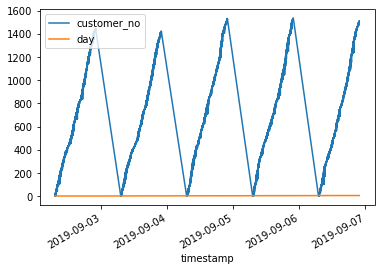

In [13]:
df.plot()

<AxesSubplot:xlabel='location', ylabel='count'>

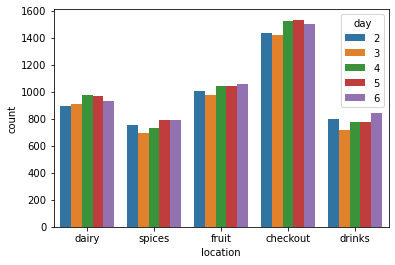

In [14]:
sns.countplot(data=df, x="location", hue="day")

In [24]:
#df_gb = df.groupby('day')
pd.crosstab(df['customer_no'], df['location'])

location,checkout,dairy,drinks,fruit,spices
customer_no,,,,,
1,5,2,2,2,1
2,5,2,2,2,1
3,5,5,3,5,5
4,5,3,2,1,1
5,5,4,3,1,3
...,...,...,...,...,...
1531,2,0,2,0,1
1532,0,1,0,0,0
1533,0,1,0,0,0
